In [1]:
# import stuff
import numpy as np
import fractions
import math
import matplotlib.pyplot as plt

In [2]:
def C(m,n):
    
    return math.factorial(m)/(math.factorial(n) * math.factorial(m-n))


In [3]:
def calc_likelihood(n,p):
    likelihood=[]
    for Pi in p:
        bernoulli = C(10,n) * np.power(Pi,n) * np.power(1-Pi,10-n)
        likelihood.append(bernoulli)
        
    return likelihood

In [4]:
def calc_px(prior,likelihood):
    px = 0.0
    for i in range(0,11):
        px += (prior[i]*likelihood[i])
        
    return px

In [5]:
def calc_posterior(prior,likelihood,px):
    posterior = []
    for i in range(0,11):
        postr = prior[i] * likelihood[i] / px
        posterior.append(postr)
    
    return posterior

In [6]:
def drawgraph(p,prior,likelihood,posterior):
    x = np.arange(11) # position of each bar on x-axis
    
    f, (p0,p1,p2) = plt.subplots(1,3,gridspec_kw = {'width_ratios':[1,1,1]})
    f.set_figwidth(20)
    
    plt.setp((p0,p1,p2),xticks=x,xticklabels=p,ylim=[0.0,1.0])
    
    p0.bar(x,prior)
    p0.set_title('prior')
    
    p1.bar(x,likelihood)
    p1.set_title('likelihood')
    
    p2.bar(x,posterior)
    p2.set_title('posterior')
    
    plt.show()

In [11]:
def main(prior):
    # variables
    # coin event: 1 = head, 0 = tail
    coin = [1,1,0,0,0,0,0,0,0,0]
    n = sum(coin) # number of heads
    
    # range of probabilities of tossing a head
    p = [i/10 for i in range(0,11)]
    
    # probablity that Pi is the probability of tossing a head = p(p) = prior
    print('Assuming the distribution of the prior is [',prior[0],end='')
    for x in prior[1:]: print(',',x,end='')
    print(' ]')
    
    # convert fraction back to float
    prior = [float(prior_i) for prior_i in prior]
    
    likelihood = calc_likelihood(n,p)
    #print('Likelihood = ',likelihood)
    
    px = calc_px(prior,likelihood)
    #print("p(x) = %.5f" % px)
    
    posterior = calc_posterior(prior,likelihood,px)
    #print("Posterior = ",posterior)
    
    mle=likelihood.index(max(likelihood))/10
    map=posterior.index(max(posterior))/10
    print("Estimated p using mle: %.1f; using map: %.1f" % (mle,map))
    drawgraph(p,prior,likelihood,posterior)
    

(a) Assuming the distribution of the prior is [ 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11 ]
Estimated p using mle: 0.2; using map: 0.2


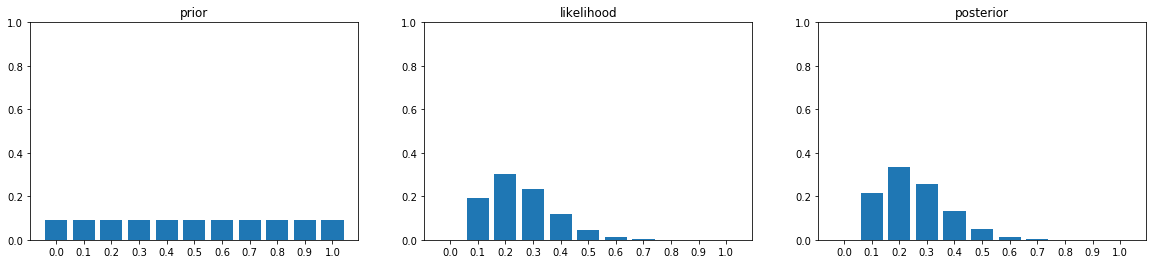

(b) Assuming the distribution of the prior is [ 0.01, 0.01, 0.05, 0.08, 0.15, 0.4, 0.15, 0.08, 0.05, 0.01, 0.01 ]
Estimated p using mle: 0.2; using map: 0.3


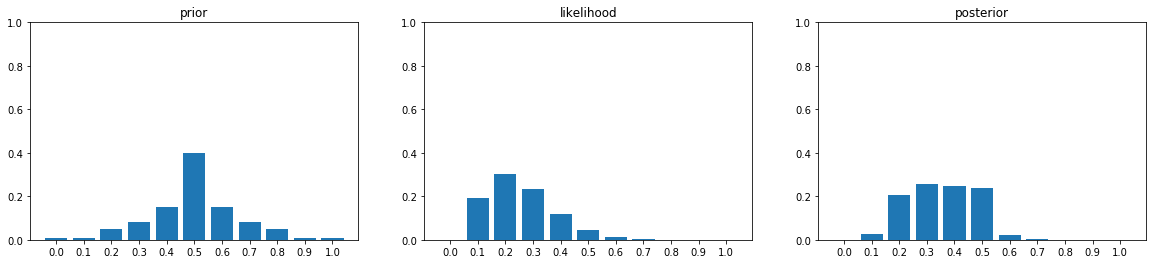

In [14]:
if __name__ == '__main__':
    print('(a) ',end='')
    main([fractions.Fraction(1/11).limit_denominator() for i in range(0,11)])
    print('(b) ',end='')
    main([0.01,0.01,0.05,0.08,0.15,0.4,0.15,0.08,0.05,0.01,0.01])